# Imports

In [1]:
%load_ext autoreload
%autoreload 2
    
import os
import sys
from typing import (
    Any,
    Dict,
    List
)

import numpy as np
from numpy import ndarray

import pandas as pd
from pandas import DataFrame

from sklearn.model_selection import (
    GridSearchCV,   
    LeaveOneOut,
    train_test_split
)
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

# Constants

In [2]:
DATA: str = "data"
DATASET_NAME: str = "2023-10-11-corrosion_inhibition_dataset.csv"

# Paths

In [3]:
# Main Path
main_path: str = os.path.dirname(os.getcwd())

# Place the main path on python path if not already there
if main_path not in sys.path:
    sys.path.insert(0, main_path)

# Data Path
data_path: str = os.path.join(main_path, DATA)

In [4]:
display(main_path)
display(data_path)

'C:\\Users\\petar\\PycharmProjects\\CorrosionInhibitorsQSPR'

'C:\\Users\\petar\\PycharmProjects\\CorrosionInhibitorsQSPR\\data'

# Corrosion package imports

In [5]:
%load_ext autoreload
%autoreload 2
    
from corrosion.analysis import Analyzer
from corrosion.applicability_domain import ApplicabilityDomain
from corrosion.enums import (
    MetricType,
    TrainTestSplitType
)
from corrosion.metrics import Metrics
from corrosion.regressors import (
    get_pca_ridge_model,
    PcaRidge
)
from corrosion.train_test_split import TrainTestSplit
from corrosion.visuals import CorrosionVisualizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Loading

In [6]:
# Load Data
dataset_path: str = os.path.join(data_path, DATASET_NAME)
data_df: DataFrame = pd.read_csv(dataset_path)

In [7]:
display(data_df)

,ID,Name,SMILES,Inhibitor Efficiency,NEW Inhibitor Efficiency,Dipole Moment,Polarisability,HOMO,LUMO,Band Gap,...,Electron Acceptor Capacity,ΔN,NBO Charge on N,log P,Solvent Accessible SA,VDW Surface Area,VDW Volume,PAE,EXP(PAE),PyridineOrQuinoline
0,sv_0001,4-dimethylaminopyridine,CN(C)c1ccncc1,0.410,1.786009,7.27944,154.081,-5.028120,-1.203830,3.824290,...,0.897971,0.826370,-0.43777,0.86,320.77,213.20,125.47,-2.760960,0.063231,0
1,sv_0002,"2,4,6-trimethylpyridine",Cc1cc(C)nc(C)c1,0.210,1.583658,3.23926,154.901,-5.930990,-1.595940,4.335050,...,1.275912,0.339930,-0.53166,1.53,377.25,226.40,129.42,-2.594520,0.074682,0
2,sv_0003,"2,6-dimethylpyridine",Cc1cccc(C)n1,0.133,1.421263,2.43685,133.929,-5.954120,-1.727920,4.226200,...,1.367623,0.592116,-0.52254,1.02,333.29,193.75,112.59,-2.558530,0.077418,0
3,sv_0004,4-methoxypyridine,COc1ccncc1,0.144,1.450566,4.87253,120.146,-6.080650,-1.495530,4.585120,...,1.135525,0.573002,-0.51915,0.60,303.97,175.61,104.87,-2.296413,0.100619,0
4,sv_0005,4-methylpyridine,Cc1ccncc1,0.119,1.379620,4.25173,112.687,-6.090990,-1.709690,4.381300,...,1.322235,0.512755,-0.50277,1.27,281.77,160.71,95.83,-2.563799,0.077012,0
5,sv_0006,2-methylpyridine,Cc1ccccn1,0.091,1.276551,2.97610,112.872,-6.033850,-1.788060,4.245790,...,1.404642,0.546940,-0.50541,0.89,287.88,160.86,95.80,-2.545336,0.078447,0
6,sv_0007,4-benzylpyridine,C(c1ccccc1)c2ccncc2,0.552,1.857005,3.89687,218.452,-6.007730,-1.861800,4.145930,...,1.617523,0.640145,-0.49828,2.85,370.87,266.73,168.01,-2.725550,0.065510,0
7,sv_0008,3-methylpyridine,Cc1cccnc1,0.068,1.161168,3.87215,112.299,-6.048270,-1.809010,4.239260,...,1.428574,0.408593,-0.49082,1.27,281.53,160.78,95.83,-2.545682,0.078420,0
8,sv_0010,pyridine,c1ccncc1,0.059,1.103902,3.42526,91.744,-6.119570,-1.852000,4.267570,...,1.446886,0.500665,-0.49220,0.76,245.64,128.00,79.01,-2.539789,0.078883,0
9,sv_0012,3-hydroxypyridine,Oc1cccnc1,0.103,1.324570,5.33041,101.749,-5.842830,-1.831050,4.011780,...,1.437248,0.629006,-0.47873,0.45,250.21,139.10,87.28,-2.510191,0.081253,0


# Data Analysis

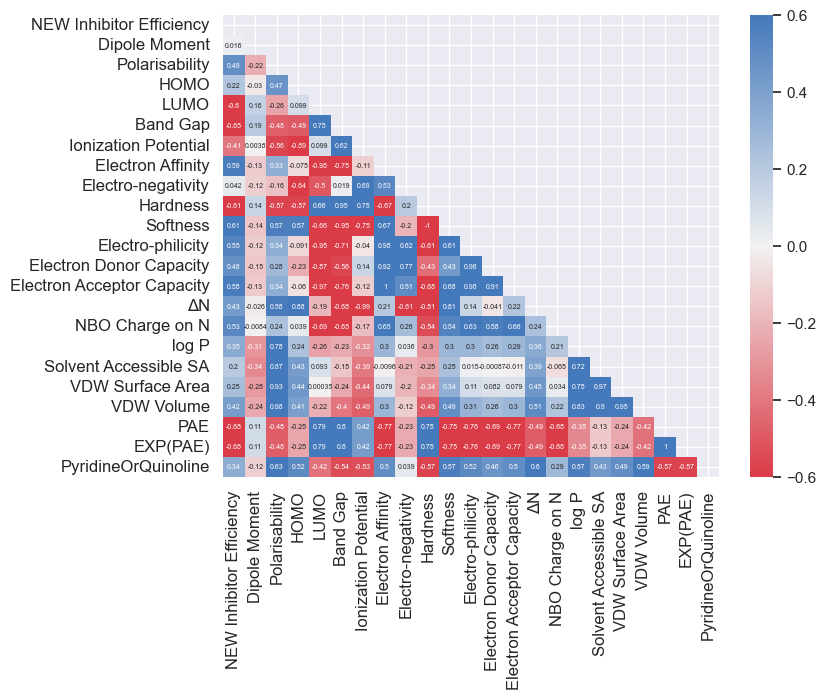

In [8]:
# Get the correlation matrix
correlation_df = data_df.iloc[:, 4:].corr(method='spearman')  # 4 from the data (first three are labels)
CorrosionVisualizer.correlation_heatmap(correlation_df)

In [9]:
# Get X
_x_df: DataFrame = data_df.iloc[:, 3:].drop(
    columns=["PAE", "EXP(PAE)", "Inhibitor Efficiency", "NEW Inhibitor Efficiency"],
    errors="ignore"
)
_x: ndarray = _x_df.values
_x_labels: List[str] = list(_x_df.columns)

# Number of compounds & features
m: int
n: int
m, n = _x.shape

# Get Y
_ys_df: DataFrame = data_df[["PAE", "Inhibitor Efficiency"]]
_y_theoretical: ndarray = np.exp(data_df["PAE"].values)
_y_experimental: ndarray = data_df["Inhibitor Efficiency"].values

In [10]:
display(_x_df.head())

,Dipole Moment,Polarisability,HOMO,LUMO,Band Gap,Ionization Potential,Electron Affinity,Electro-negativity,Hardness,Softness,Electro-philicity,Electron Donor Capacity,Electron Acceptor Capacity,ΔN,NBO Charge on N,log P,Solvent Accessible SA,VDW Surface Area,VDW Volume,PyridineOrQuinoline
0,7.27944,154.081,-5.02812,-1.20383,3.82429,5.494600,0.882037,3.188319,2.306281,0.433598,2.203845,4.086290,0.897971,0.826370,-0.43777,0.86,320.77,213.20,125.47,0
1,3.23926,154.901,-5.93099,-1.59594,4.33505,8.096999,1.243737,4.670368,3.426631,0.291832,3.182767,5.946280,1.275912,0.339930,-0.53166,1.53,377.25,226.40,129.42,0
2,2.43685,133.929,-5.95412,-1.72792,4.22620,6.524833,1.366477,3.945655,2.579178,0.387720,3.018053,5.313278,1.367623,0.592116,-0.52254,1.02,333.29,193.75,112.59,0
3,4.87253,120.146,-6.08065,-1.49553,4.58512,6.600265,1.124627,3.862446,2.737819,0.365254,2.724521,4.997971,1.135525,0.573002,-0.51915,0.60,303.97,175.61,104.87,0
4,4.25173,112.687,-6.09099,-1.70969,4.38130,6.928478,1.321071,4.124774,2.803703,0.356671,3.034159,5.447009,1.322235,0.512755,-0.50277,1.27,281.77,160.71,95.83,0


In [11]:
display(_ys_df.head())

,PAE,Inhibitor Efficiency
0,-2.760960,0.410
1,-2.594520,0.210
2,-2.558530,0.133
3,-2.296413,0.144
4,-2.563799,0.119


# Approaches

1. PCA Analysis to determine which features are relevant?
2. Predict only the computational adsorption energy
3. Co-train the computational & experimental adsorption energies
4. Use both linear and non-linear models (ANN? RFs?)
5. General approach:
   - Train/Test Split (Holdout set)
   - Cross-validation
   - Grid search to optimize the hyper-parameters
   - Validate by analysing the metrics, applicability domain
   - Stack of multiple regressors?

# Train/Test Split

In [12]:
BT_RATIO: float = 0.3
NUM_TEST: int = round(BT_RATIO * m)

In [13]:
train_idx, test_idx = TrainTestSplit.split(
    train_test_split_type=TrainTestSplitType.Kenstone,
    x=_x,
    num_test=NUM_TEST
)

In [14]:
_x_train = _x[train_idx, :]
_x_bt = _x[test_idx, :]
_y_theoretical_train = _y_theoretical[train_idx]
_y_theoretical_bt = _y_theoretical[test_idx]
_y_exp_train = _y_experimental[train_idx]
_y_exp_bt = _y_experimental[test_idx]

In [15]:
# Display shapes for confirmation
display(_x_train.shape)
display(_x_bt.shape)
display(_y_theoretical_train.shape)
display(_y_theoretical_bt.shape)
display(_y_exp_train.shape)
display(_y_exp_bt.shape)

(29, 20)

(12, 20)

(29,)

(12,)

(29,)

(12,)

# Model 1. PCA-Ridge (Theoretical Model)

### Model Training

In [16]:
param_grid = {
    "n_components": range(2, 10),
    "alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100]
}

In [17]:
_pca_ridge_theoretical: GridSearchCV = get_pca_ridge_model(
    param_grid=param_grid,
    cv=LeaveOneOut()
)

In [18]:
_pca_ridge_theoretical.fit(_x_train, _y_theoretical_train)

Fitting 29 folds for each of 72 candidates, totalling 2088 fits
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05,

GridSearchCV(cv=LeaveOneOut(), estimator=PcaRidge(), n_jobs=1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50,
                                   100],
                         'n_components': range(2, 10)},
             scoring='neg_root_mean_squared_error', verbose=2)

In [19]:
print(
    f"Optimal parameters for theoretical model: "
    f"n(PCs) = {_pca_ridge_theoretical.best_estimator_.n_components}; "
    f"alpha = {_pca_ridge_theoretical.best_estimator_.alpha}; "
    f"RMSECV = {-_pca_ridge_theoretical.best_score_}."
)

Optimal parameters for theoretical model: n(PCs) = 2; alpha = 1e-05; RMSECV = 0.014391027302560576.


### Model Analysis

In [20]:
_y_theoretical_train_hat_model1: ndarray = _pca_ridge_theoretical.predict(_x_train).ravel()
_y_theoretical_bt_hat_model1: ndarray = _pca_ridge_theoretical.predict(_x_bt).ravel()

### Metrics & Visuals

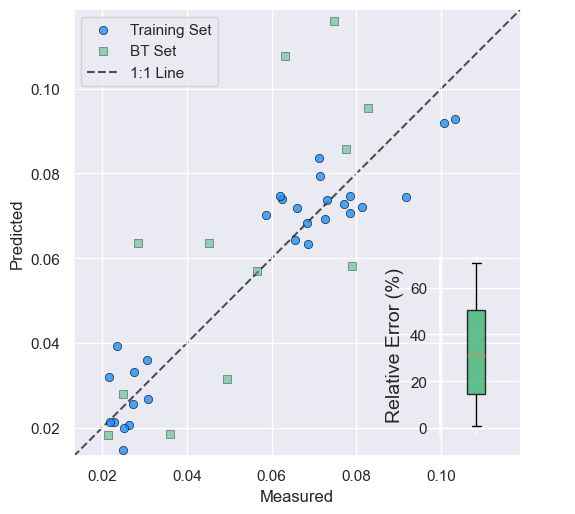

In [24]:
CorrosionVisualizer.predictive_ability_plot(
    y_train=_y_theoretical_train,
    y_train_hat=_y_theoretical_train_hat_model1,
    y_bt=_y_theoretical_bt,
    y_bt_hat=_y_theoretical_bt_hat_model1
)

In [25]:
_pca_ridge_metrics: Dict[str, Any] = {
    "RMSE(train)": Metrics.get_metric(
        y=_y_theoretical_train,
        y_hat=_y_theoretical_train_hat_model1,
        metric_type=MetricType.RMSE
    ),
    "RMSE(BT)": Metrics.get_metric(
        y=_y_theoretical_bt,
        y_hat=_y_theoretical_bt_hat_model1,
        metric_type=MetricType.RMSE
    )
}
_pca_ridge_metrics_df: DataFrame = pd.DataFrame.from_dict(
    _pca_ridge_metrics,
    orient="index"
)
display(_pca_ridge_metrics_df)

,0
RMSE(train),0.008274
RMSE(BT),0.023377


### Applicability Domain

In [26]:
(
    hat_star_model1,
    hat_train_model1, hat_validation_model1, hat_bt_model1,
    res_scaled_train_model1, res_scaled_validation_model1, res_scaled_bt_model1
) = ApplicabilityDomain.calculate(
    x_train=_x_train,
    y_train=_y_theoretical_train,
    y_train_hat=_y_theoretical_train_hat_model1,
    x_bt=_x_bt,
    y_bt=_y_theoretical_bt,
    y_bt_hat=_y_theoretical_bt_hat_model1
)

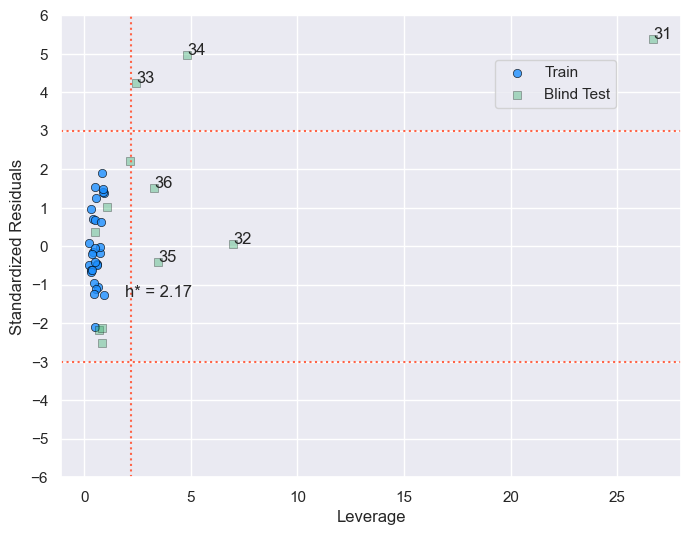

In [27]:
CorrosionVisualizer.applicability_domain_plot(
    hat_star=hat_star_model1,
    hat_train=hat_train_model1,
    res_scaled_train=res_scaled_train_model1,
    hat_bt=hat_bt_model1,
    res_scaled_bt=res_scaled_bt_model1
)

# Model 2. Ridge (Theoretical Model)

### Model Training

In [28]:
param_grid = {
    "alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100]
}

In [29]:
_ridge_theoretical: GridSearchCV = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    verbose=2,
    n_jobs=1,
    cv=LeaveOneOut()
)

In [30]:
_ridge_theoretical.fit(_x_train, _y_theoretical_train)

Fitting 29 folds for each of 9 candidates, totalling 261 fits
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ......................................

GridSearchCV(cv=LeaveOneOut(), estimator=Ridge(), n_jobs=1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50,
                                   100]},
             scoring='neg_root_mean_squared_error', verbose=2)

### Model Analysis

In [31]:
print(
    f"Optimal parameters for theoretical model: "
    f"alpha = {_ridge_theoretical.best_estimator_.alpha}; "
    f"RMSECV = {-_ridge_theoretical.best_score_}."
)

Optimal parameters for theoretical model: alpha = 10; RMSECV = 0.009659791453738444.


In [32]:
_y_theoretical_train_hat_model2: ndarray = _ridge_theoretical.predict(_x_train).ravel()
_y_theoretical_bt_hat_model2: ndarray = _ridge_theoretical.predict(_x_bt).ravel()

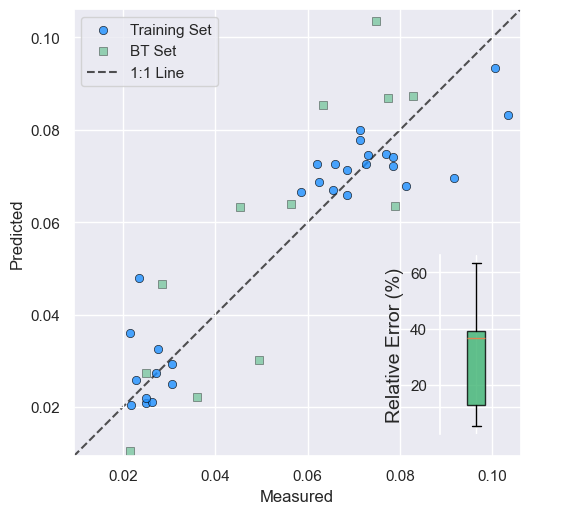

In [33]:
CorrosionVisualizer.predictive_ability_plot(
    y_train=_y_theoretical_train,
    y_train_hat=_y_theoretical_train_hat_model2,
    y_bt=_y_theoretical_bt,
    y_bt_hat=_y_theoretical_bt_hat_model2
)

In [34]:
_pca_ridge_metrics: Dict[str, Any] = {
    "RMSE(train)": Metrics.get_metric(
        y=_y_theoretical_train,
        y_hat=_y_theoretical_train_hat_model2,
        metric_type=MetricType.RMSE
    ),
    "RMSE(BT)": Metrics.get_metric(
        y=_y_theoretical_bt,
        y_hat=_y_theoretical_bt_hat_model2,
        metric_type=MetricType.RMSE
    )
}
_pca_ridge_metrics_df: DataFrame = pd.DataFrame.from_dict(
    _pca_ridge_metrics,
    orient="index"
)
display(_pca_ridge_metrics_df)

,0
RMSE(train),0.009306
RMSE(BT),0.016001


### Applicability Domain

In [35]:
(
    hat_star_model2,
    hat_train_model2, hat_validation_model2, hat_bt_model2,
    res_scaled_train_model2, res_scaled_validation_model2, res_scaled_bt_model2
) = ApplicabilityDomain.calculate(
    x_train=_x_train,
    y_train=_y_theoretical_train,
    y_train_hat=_y_theoretical_train_hat_model2,
    x_bt=_x_bt,
    y_bt=_y_theoretical_bt,
    y_bt_hat=_y_theoretical_bt_hat_model2
)

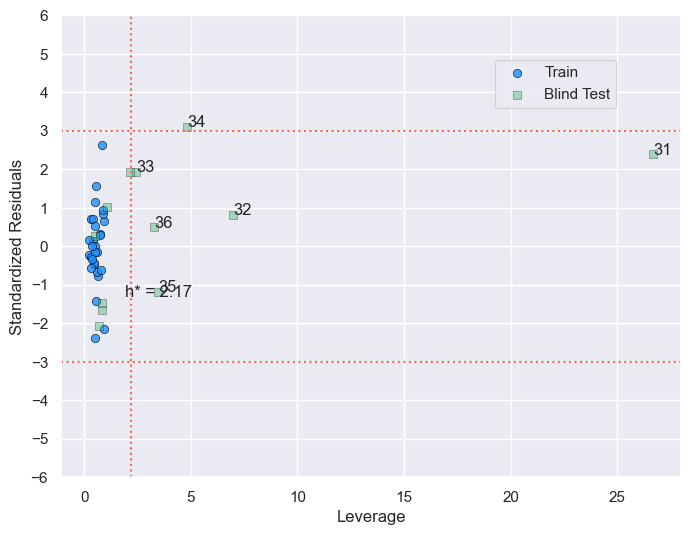

In [36]:
CorrosionVisualizer.applicability_domain_plot(
    hat_star=hat_star_model2,
    hat_train=hat_train_model2,
    res_scaled_train=res_scaled_train_model2,
    hat_bt=hat_bt_model2,
    res_scaled_bt=res_scaled_bt_model2
)

# Model 3. Gradient Boosting Ensemble (Theoretical)

### Model Training

In [58]:
gb_param_grid = {
    "max_depth": range(2, 11),
    "n_estimators": [5, 10, 50, 100, 250, 500],
    "min_samples_leaf": range(2, 11)
}

In [59]:
_gb_theoretical: GridSearchCV = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid=gb_param_grid,
    scoring="neg_root_mean_squared_error",
    verbose=10,
    n_jobs=12,
    cv=LeaveOneOut()
)

In [60]:
_gb_theoretical.fit(_x_train, _y_theoretical_train)

Fitting 29 folds for each of 486 candidates, totalling 14094 fits


GridSearchCV(cv=LeaveOneOut(), estimator=GradientBoostingRegressor(), n_jobs=12,
             param_grid={'max_depth': range(2, 11),
                         'min_samples_leaf': range(2, 11),
                         'n_estimators': [5, 10, 50, 100, 250, 500]},
             scoring='neg_root_mean_squared_error', verbose=10)

### Model Analysis

In [61]:
print(
    f"Optimal parameters for theoretical model: "
    f"max depth = {_gb_theoretical.best_estimator_.max_depth}; "
    f"n(estimators) = {_gb_theoretical.best_estimator_.n_estimators}; "
    f"RMSECV = {-_gb_theoretical.best_score_}."
)

Optimal parameters for theoretical model: max depth = 2; n(estimators) = 100; RMSECV = 0.0067152083706004265.


In [62]:
_y_theoretical_train_hat_model3: ndarray = _gb_theoretical.predict(_x_train).ravel()
_y_theoretical_bt_hat_model3: ndarray = _gb_theoretical.predict(_x_bt).ravel()

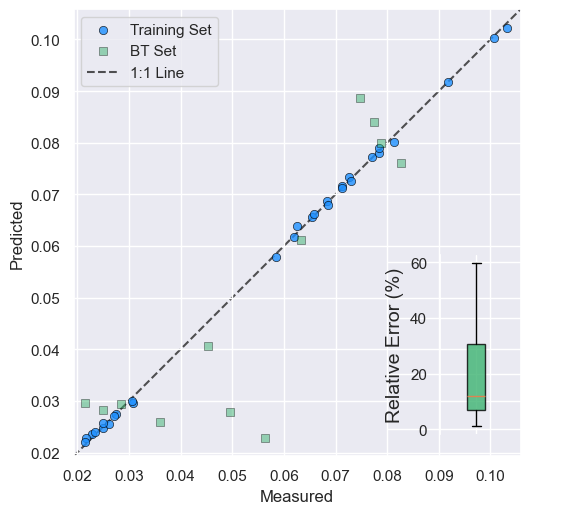

In [63]:
CorrosionVisualizer.predictive_ability_plot(
    y_train=_y_theoretical_train,
    y_train_hat=_y_theoretical_train_hat_model3,
    y_bt=_y_theoretical_bt,
    y_bt_hat=_y_theoretical_bt_hat_model3
)

In [64]:
_gb_metrics: Dict[str, Any] = {
    "RMSE(train)": Metrics.get_metric(
        y=_y_theoretical_train,
        y_hat=_y_theoretical_train_hat_model3,
        metric_type=MetricType.RMSE
    ),
    "RMSE(BT)": Metrics.get_metric(
        y=_y_theoretical_bt,
        y_hat=_y_theoretical_bt_hat_model3,
        metric_type=MetricType.RMSE
    )
}
_gb_metrics_df: DataFrame = pd.DataFrame.from_dict(
    _gb_metrics,
    orient="index"
)
display(_gb_metrics_df)

,0
RMSE(train),0.000636
RMSE(BT),0.013211


In [65]:
(
    hat_star_model3,
    hat_train_model3, hat_validation_model3, hat_bt_model3,
    res_scaled_train_model3, res_scaled_validation_model3, res_scaled_bt_model3
) = ApplicabilityDomain.calculate(
    x_train=_x_train,
    y_train=_y_theoretical_train,
    y_train_hat=_y_theoretical_train_hat_model3,
    x_bt=_x_bt,
    y_bt=_y_theoretical_bt,
    y_bt_hat=_y_theoretical_bt_hat_model3
)

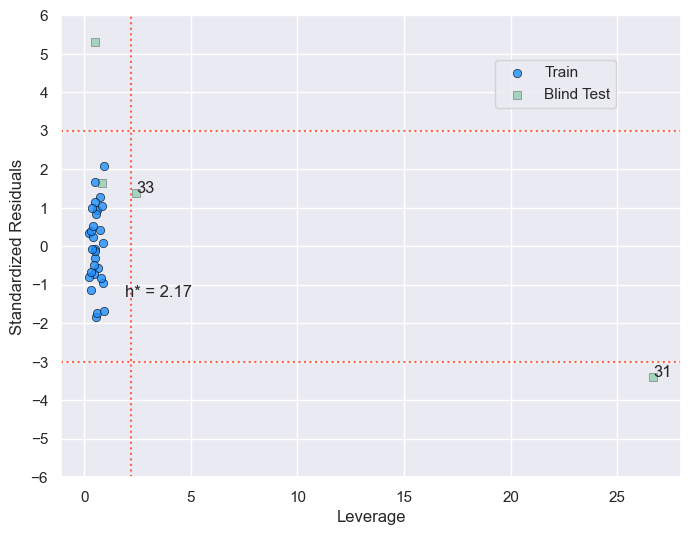

In [66]:
CorrosionVisualizer.applicability_domain_plot(
    hat_star=hat_star_model3,
    hat_train=hat_train_model3,
    res_scaled_train=res_scaled_train_model3,
    hat_bt=hat_bt_model3,
    res_scaled_bt=res_scaled_bt_model3
)